In [220]:
import pandas as pd
import time
from datetime import datetime, date,timedelta
import os
from pandas.tseries.offsets import *
%matplotlib inline
os.chdir('E:/VINOD KUMAR/Project_neospark_kristab')

In [221]:
#Listing all files in working directory
os.listdir()

['.RData',
 '.Rhistory',
 'Book1.xlsx',
 'datestimes.pdf',
 'four_employees_merged.csv',
 'Pulse_data.R',
 'Pulse_first_emplee_details.R',
 'TBE DCR _abhishek_dasari.csv',
 'TBE_DCR _A _APPUSAMY.csv',
 'TBE_DCR_ABHIJIT_SAHA.csv',
 'TBE_DCR_Basantha.csv']

In [222]:
#Employee records 
empl=pd.read_csv('TBE DCR _abhishek_dasari.csv')
emp2=pd.read_csv('TBE_DCR _A _APPUSAMY.csv')
emp3=pd.read_csv('TBE_DCR_ABHIJIT_SAHA.csv')
emp4=pd.read_csv('TBE_DCR_Basantha.csv')

In [223]:
#shape of employee records
print(empl.shape)
print(emp2.shape)
print(emp3.shape)
print(emp4.shape)

(2624, 28)
(3259, 28)
(2662, 28)
(2948, 28)


In [224]:
#combining all employee records into one record
data = empl.append(pd.DataFrame(data = empl), ignore_index=True)

In [225]:
data = data.append(pd.DataFrame(data = emp3),ignore_index=True)

In [226]:
data = data.append(pd.DataFrame(data= emp4), ignore_index=True)

In [227]:
#data frame after merging 
print(data.shape)

(10858, 28)


In [229]:
#Summary of data frame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 28 columns):
Date                        10858 non-null object
Time                        10858 non-null object
Code                        10858 non-null object
Name                        10858 non-null object
Region                      10858 non-null object
Role                        10858 non-null object
Head Quarter                10858 non-null object
Customer                    10858 non-null object
Specialization              10858 non-null object
Location                    10858 non-null object
Reported Location           0 non-null float64
Visit Status                10858 non-null object
Brand                       10858 non-null object
Prescriber Status           10858 non-null object
Call Notes                  10858 non-null object
Sub Call Notes              10858 non-null object
Sample                      3069 non-null object
Quantity                    10858 non-null in

In [230]:
#combining date and time column into one column 
data['Date'] = data[['Date','Time']].apply(lambda x:' '.join(x.astype(str)), axis=1)

In [231]:
data['Date'].head()

0    4/30/2018 14:10:13
1    4/30/2018 14:10:13
2    4/30/2018 14:10:13
3    4/30/2018 14:09:18
4    4/30/2018 14:09:18
Name: Date, dtype: object

In [232]:
#changing data type of Date column string to datetime dtype
data["Date"]=pd.to_datetime(data.Date)

In [233]:
#removed time cloumn
del data["Time"]

In [234]:
data.head()

,Date,Code,Name,Region,Role,Head Quarter,Customer,Specialization,Location,Reported Location,...,Promo Item,Item Quantity,Working Manager,Reporting Manager,Division,Customer Location Status,Comments,View Location,View Orders,View Collections
0,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,NaN,0,NaN,THIMMAPPA MANGALA (ABM),STIMULUS,Yes,None,NaN,NaN,NaN
1,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,NaN,0,NaN,THIMMAPPA MANGALA (ABM),STIMULUS,Yes,None,NaN,NaN,NaN
2,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,NaN,0,NaN,THIMMAPPA MANGALA (ABM),STIMULUS,Yes,None,NaN,NaN,NaN
3,2018-04-30 14:09:18,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHWIN PAI.V,NEURO SURGEON,NIMS,NaN,...,NaN,0,NaN,THIMMAPPA MANGALA (ABM),STIMULUS,Yes,None,NaN,NaN,NaN
4,2018-04-30 14:09:18,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHWIN PAI.V,NEURO SURGEON,NIMS,NaN,...,NaN,0,NaN,THIMMAPPA MANGALA (ABM),STIMULUS,Yes,None,NaN,NaN,NaN


In [235]:
data["Date"].head()

0   2018-04-30 14:10:13
1   2018-04-30 14:10:13
2   2018-04-30 14:10:13
3   2018-04-30 14:09:18
4   2018-04-30 14:09:18
Name: Date, dtype: datetime64[ns]

In [236]:
data["hours"]=data.Date.dt.hour

In [237]:
data["week_day"]=data.Date.dt.weekday_name

In [238]:
data["day_Date"]=data.Date.dt.day

In [239]:
data["month"]=data.Date.dt.month

In [240]:
data["minutes"]=data.Date.dt.minute

In [241]:
data["weekday"]=data.Date.dt.weekday

In [242]:
print(data.Location.value_counts(),"\n\n Specialization \n \n",data.Specialization.value_counts())

NIMS                    3456
GUWAHATI                1082
CARE - BANJARA HILLS     642
BARPETA ROAD             629
BARPETA TOWN             560
BHANGAGHAR               468
YASHODA - SOMAJIGUDA     458
BANJARA HILLS            452
NALBARI                  434
VIP ROAD - GWH           297
HOWLY                    292
KALGACHIYA               251
BELTOLA                  239
DISPUR                   205
MANGALDAI                169
SORBHOG                  140
SIXMILE                  134
LAKDIKAPUL               132
KUAKUCHI                 128
SOMAJIGUDA               108
PATHSALA                 103
NOONMATI                  88
BIJOYNAGAR                67
PHUTHIMARI                55
BAMUNIMAIDAM              54
BAHARI                    39
CHENGA                    36
DOROKOHORA                33
BHABANIPUR                30
NARENGI                   19
KALAIGAON                 16
KUKARPAR                  14
MIRZA                     13
BONDA                      9
SORUPETA      

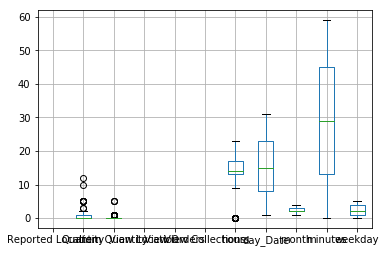

In [243]:
data.boxplot()

In [244]:
data.hours.value_counts()

13    2187
14    2058
15    1357
12    1041
16     742
19     732
17     612
18     571
20     525
21     446
11     275
22     185
23      70
10      23
0       19
9       15
Name: hours, dtype: int64

In [250]:
data['Customer Location Status'].value_counts()

Yes    10750
No       108
Name: Customer Location Status, dtype: int64

In [219]:
data.to_csv("four_employees_merged.csv",index=False)

In [163]:
data.head(10)

,Date,Code,Name,Region,Role,Head Quarter,Customer,Specialization,Location,Reported Location,...,Comments,View Location,View Orders,View Collections,hours,week_day,day_Date,month,minutes,weekday
0,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,10,0
1,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,10,0
2,2018-04-30 14:10:13,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHOK KUMAR RAJU.K,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,10,0
3,2018-04-30 14:09:18,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHWIN PAI.V,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,9,0
4,2018-04-30 14:09:18,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHWIN PAI.V,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,9,0
5,2018-04-30 14:09:18,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,ASHWIN PAI.V,NEURO SURGEON,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,9,0
6,2018-04-30 14:16:44,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,B RUPAM,NEUROLOGIST,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,16,0
7,2018-04-30 14:16:44,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,B RUPAM,NEUROLOGIST,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,16,0
8,2018-04-30 14:16:44,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,B RUPAM,NEUROLOGIST,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,16,0
9,2018-04-30 14:16:44,E5513,ABHISHEK DASARI,TELANGANA,TBE,HYDERABAD,B RUPAM,NEUROLOGIST,NIMS,NaN,...,None,NaN,NaN,NaN,14,Monday,30,4,16,0


In [164]:
data.tail(10)

,Date,Code,Name,Region,Role,Head Quarter,Customer,Specialization,Location,Reported Location,...,Comments,View Location,View Orders,View Collections,hours,week_day,day_Date,month,minutes,weekday
10848,2018-01-02 21:38:15,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,RAJ PRATIM DAS,CONSULTANT PHYSICIAN,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,21,Tuesday,2,1,38,1
10849,2018-01-02 21:38:15,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,RAJ PRATIM DAS,CONSULTANT PHYSICIAN,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,21,Tuesday,2,1,38,1
10850,2018-01-02 13:18:23,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,SUKUNTALA MAHANTA,GYNECOLOGIST,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,13,Tuesday,2,1,18,1
10851,2018-01-02 13:18:23,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,SUKUNTALA MAHANTA,GYNECOLOGIST,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,13,Tuesday,2,1,18,1
10852,2018-01-02 13:18:23,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,SUKUNTALA MAHANTA,GYNECOLOGIST,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,13,Tuesday,2,1,18,1
10853,2018-01-02 13:18:23,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,SUKUNTALA MAHANTA,GYNECOLOGIST,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,13,Tuesday,2,1,18,1
10854,2018-01-02 13:18:23,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,SUKUNTALA MAHANTA,GYNECOLOGIST,BHANGAGHAR,NaN,...,None,NaN,NaN,NaN,13,Tuesday,2,1,18,1
10855,2018-01-02 21:43:05,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,S D COUHDHARY,DIABETOLOGIST,GUWAHATI,NaN,...,None,NaN,NaN,NaN,21,Tuesday,2,1,43,1
10856,2018-01-02 21:43:05,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,S D COUHDHARY,DIABETOLOGIST,GUWAHATI,NaN,...,None,NaN,NaN,NaN,21,Tuesday,2,1,43,1
10857,2018-01-02 21:43:05,E5622,BIKASH KALITA,ASSAM,TBE,GUWAHATI,S D COUHDHARY,DIABETOLOGIST,GUWAHATI,NaN,...,None,NaN,NaN,NaN,21,Tuesday,2,1,43,1


In [180]:
data.groupby("Location").hours.agg(["count","min",'max',"mean"])

,count,min,max,mean
Location,,,,
BAHARI,39,14,17,15.641026
BAMUNIMAIDAM,54,17,22,20.314815
BANJARA HILLS,452,14,17,15.384956
BARPETA ROAD,629,11,21,16.492846
BARPETA TOWN,560,12,19,16.282143
BELTOLA,239,9,22,17.338912
BHABANIPUR,30,14,16,15.300000
BHANGAGHAR,468,12,23,18.331197
BIJOYNAGAR,67,13,21,16.373134


In [184]:
data.groupby("Location").hours.max()

Location
BAHARI                  17
BAMUNIMAIDAM            22
BANJARA HILLS           17
BARPETA ROAD            21
BARPETA TOWN            19
BELTOLA                 22
BHABANIPUR              16
BHANGAGHAR              23
BIJOYNAGAR              21
BONDA                   22
CARE - BANJARA HILLS    17
CHENGA                  16
DISPUR                  23
DOROKOHORA              21
GUWAHATI                23
HOWLY                   21
KALAIGAON               18
KALGACHIYA              15
KUAKUCHI                20
KUKARPAR                14
LAKDIKAPUL              13
MANGALDAI               22
MIRZA                   19
NALBARI                 19
NARENGI                 22
NIMS                    15
NOONMATI                23
PATHSALA                15
PHUTHIMARI              21
SIXMILE                 21
SOMAJIGUDA              15
SORBHOG                 15
SORUPETA                16
VIP ROAD - GWH          22
YASHODA - SOMAJIGUDA    17
Name: hours, dtype: int64

In [194]:
data.Date.max()

Timestamp('2018-04-30 19:02:06')

In [195]:
data.Date.min()

Timestamp('2018-01-01 13:19:29')

In [158]:
data.columns

Index(['Date', 'Code', 'Name', 'Region', 'Role', 'Head Quarter', 'Customer',
       'Specialization', 'Location', 'Reported Location', 'Visit Status',
       'Brand', 'Prescriber Status', 'Call Notes', 'Sub Call Notes', 'Sample',
       'Quantity', 'Promo Item', 'Item Quantity', 'Working Manager',
       'Reporting Manager', 'Division', 'Customer Location Status', 'Comments',
       'View Location', 'View Orders', 'View Collections', 'hours', 'week_day',
       'day_Date', 'month', 'minutes', 'weekday'],
      dtype='object')

In [132]:
data.Customer.describe()

count          2662
unique          133
top       SHAH ALAM
freq             56
Name: Customer, dtype: object

In [135]:
data.Customer.value_counts()

SHAH ALAM                56
ZEHERUL ISLAM            50
DILIP KUMAR CHOUDHURY    49
PARSU RAM PATHAK         48
HASMAT ALI               45
MUSTAK AHMED             45
SUJIT SARKAR             42
PRADIP RAJBONGSHI        41
NABAJIT BARMAN           40
UDAY KUMAR SARMA         39
SONATAN DAS              39
AJIT KUMAR CHOUDHURY     39
SHAMSUL ALAM             39
GOPAL KALITA             36
S A ZADID                36
URBOSHI GOSWAMI          36
KAMALESWAR DAS           35
G N DAS                  34
MANOJ CHOUDHURY          33
S S BAISISTHA            33
NAZRUL ISLAM             33
RUPJYOTI KALITA          33
MIHIR KUMAR BHUYAN       32
S AHMED                  30
ABU SAHID AKTAR          30
HILLOL SARKAR            30
ABONI KUMAR DAS          30
SUBUR ALI AHMED          30
MANIDIPA ROY             30
SUSHIL KUMAR OJAH        30
                         ..
HEMKANTA SARMA            9
RUPAM CHOUDHURY           9
S N PATHGIRI              9
CHAMPAK CHOUDHURY         8
S ISLAM             

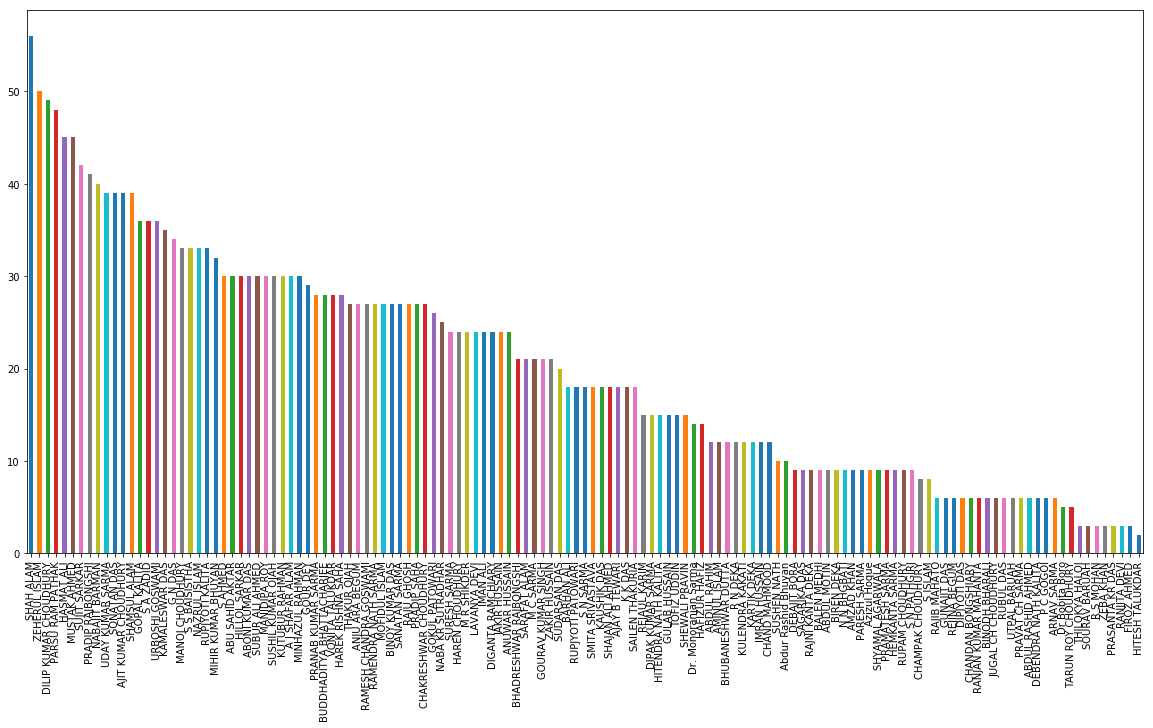

In [145]:
plt.rcParams["figure.figsize"] = (20,10)
data.Customer.value_counts().plot(kind='bar')

In [118]:
data.groupby("Customer").weekday.agg(["count","min",'max',"mean"])

,count,min,max,mean
Customer,,,,
Abdur Rashid Bhuyan,10,0,4,1.600000
A J SHAFAR ALAM,30,1,4,2.600000
ABDUL MOTIN,9,0,1,0.666667
ABDUL RAHIM,12,0,5,2.500000
ABDUL RASHID AHMED,6,0,1,0.666667
ABONI KUMAR DAS,30,2,5,3.600000
ABU SAHID AKTAR,30,1,4,2.600000
AJAY B TEWARI,18,0,2,1.166667
AJIT KUMAR CHOUDHURY,39,0,5,2.076923


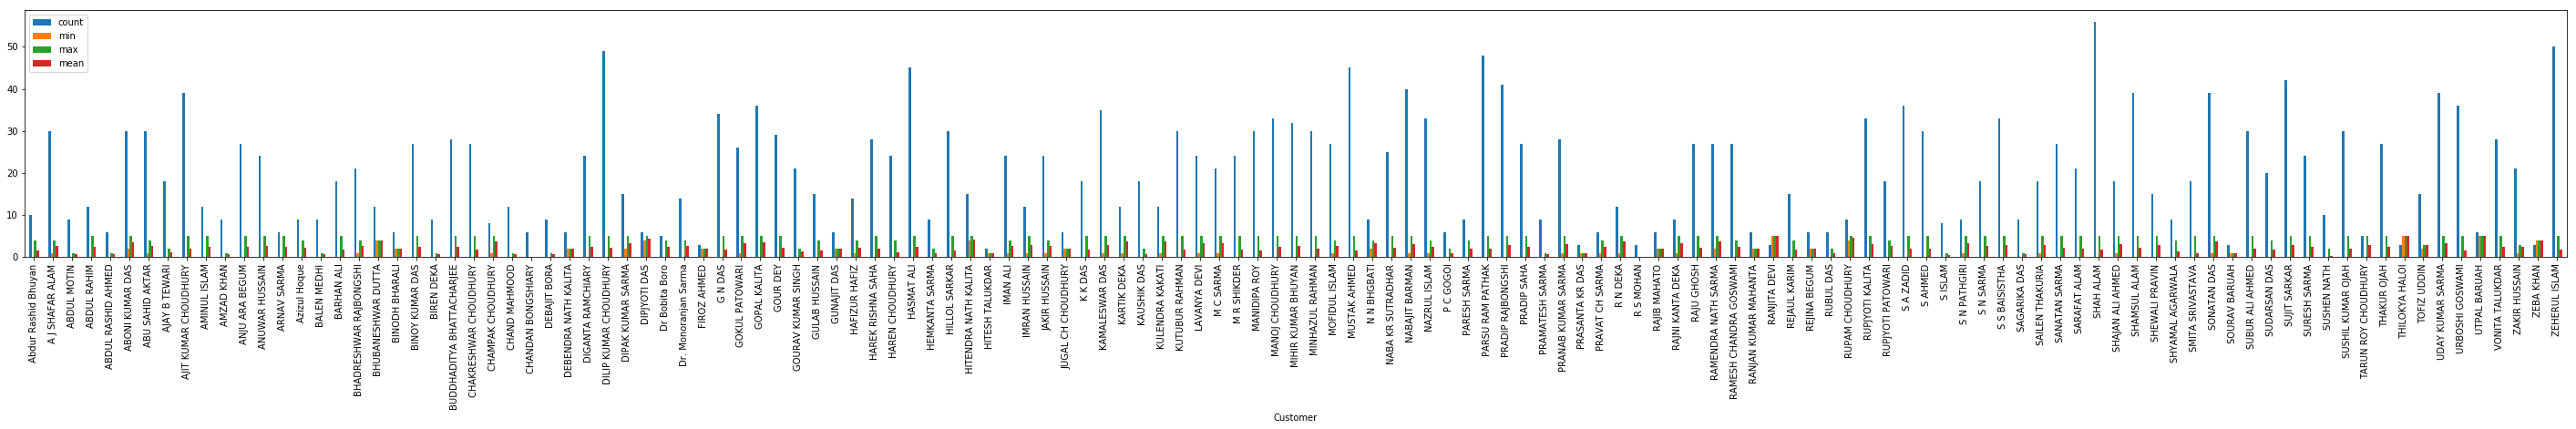

In [130]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)

data.groupby("Customer").weekday.agg(["count","min",'max',"mean"]).plot(kind='bar')

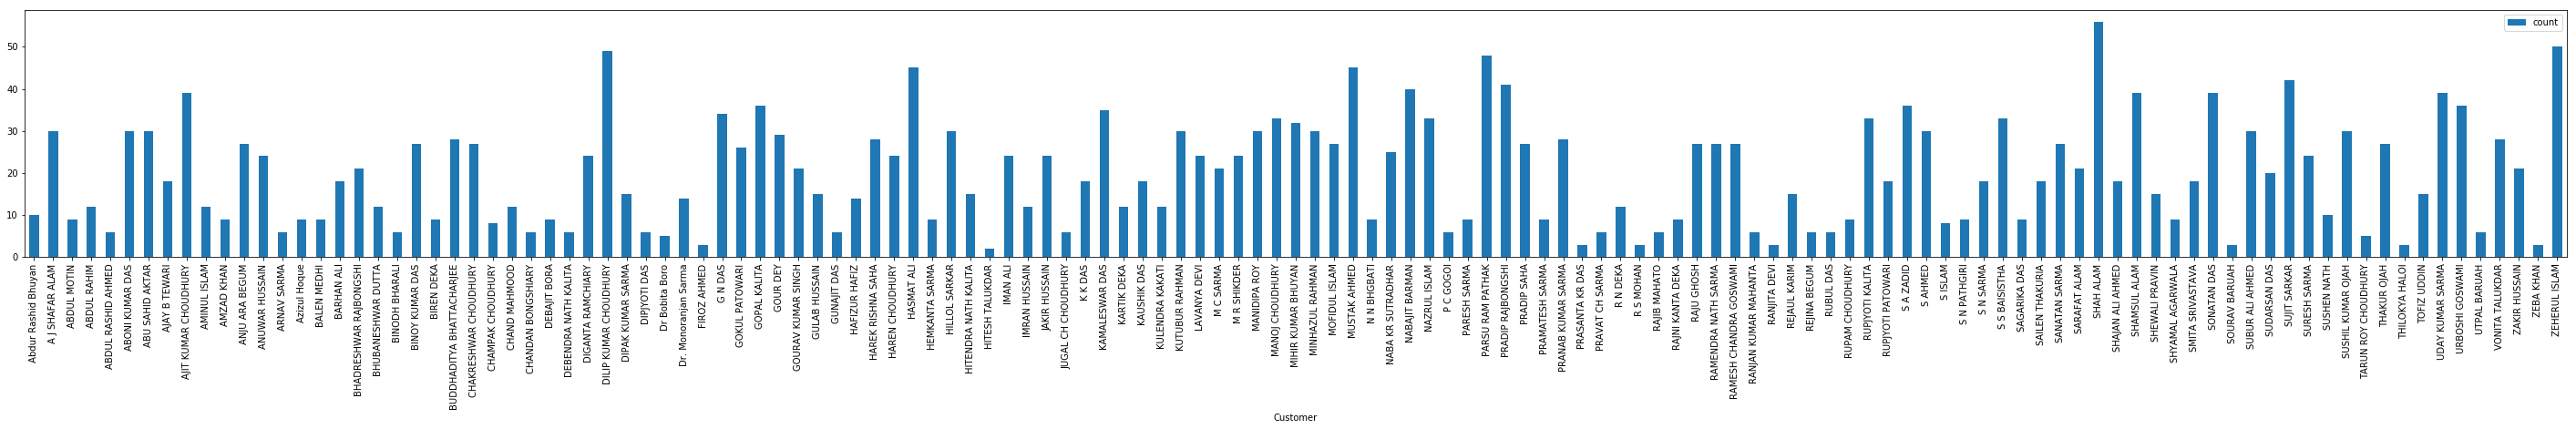

In [131]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,5)
data.groupby("Customer").weekday.agg(["count"]).plot(kind='bar')

In [158]:
data.week_day.value_counts()

Wednesday    526
Tuesday      504
Friday       422
Thursday     418
Monday       418
Saturday     374
Name: week_day, dtype: int64

In [161]:
data.hours.value_counts()

15    395
13    368
18    361
14    346
17    317
16    290
19    268
12    211
11     44
20     42
21     15
10      5
Name: hours, dtype: int64

In [168]:
data.hours.agg(["min","max","mean"])

min     10.000000
max     21.000000
mean    15.549587
Name: hours, dtype: float64

In [181]:
data.weekday.value_counts()

2    526
1    504
4    422
3    418
0    418
5    374
Name: weekday, dtype: int64

In [237]:
#data["Location"]=data.Location.astype("category")
data.Location=data.Location.astype('category')

In [257]:
location=pd.get_dummies(data.Location)

In [238]:
data.dtypes

Date                        datetime64[ns]
Time                                object
Code                                object
Name                                object
Region                              object
Role                                object
Head Quarter                        object
Customer                            object
Specialization                      object
Location                          category
Reported Location                  float64
Visit Status                        object
Brand                               object
Prescriber Status                   object
Call Notes                          object
Sub Call Notes                      object
Sample                             float64
Quantity                             int64
Promo Item                         float64
Item Quantity                        int64
Working Manager                     object
Reporting Manager                   object
Division                            object
Customer Lo

In [258]:
train_data=data[["weekday","hours"]]

In [259]:
train_data= pd.concat([train_data,location], axis=1) 

In [260]:
train_data.shape

(2662, 15)

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [283]:
clf = LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False)
#clf=MultinomialNB()

In [284]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, data.Customer, test_size=0.2)

In [285]:
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [286]:
clf.score(X_train,y_train)

0.16627524659464538

In [287]:
clf.score(X_valid, y_valid)

0.10131332082551595